## Importing MNIST dataset from the Keras module

In [1]:
from tensorflow import keras
from keras.datasets import mnist
from matplotlib import pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

2024-04-29 20:16:40.481280: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


## Load your custom data

In [2]:
import os
import cv2
import numpy as np

## Apply data augmentation and retrieve augmented samples(each time you run this code, 1000 samples will be added to your dataset)

In [3]:
# # Define the path to your dataset directory
# dataset_dir = "fine_tune_data"

# # Define the list of class names
# class_names = sorted(os.listdir(dataset_dir))

# # Define the number of images you want to generate for each class
# num_images_per_class = 100

# # Initialize ImageDataGenerator for augmentation
# datagen = ImageDataGenerator(
#     rotation_range=25,  # Rotate images randomly up to 20 degrees
#     width_shift_range=0.1,  # Shift images horizontally by up to 10%
#     height_shift_range=0.1,  # Shift images vertically by up to 10%
#     zoom_range=0.1,  # Zoom images by up to 10%
#     horizontal_flip=False,  # Flip images horizontally
#     vertical_flip=False,  # Do not flip images vertically
#     fill_mode='nearest'  # Fill in missing pixels with the nearest value
# )

# # Loop through each class folder
# for class_name in class_names:
#     class_dir = os.path.join(dataset_dir, class_name)
#     images = []
    
#     # Loop through each image in the class folder
#     for image_name in os.listdir(class_dir):
#         image_path = os.path.join(class_dir, image_name)
#         image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read image in grayscale
#         image = cv2.resize(image, (28, 28))  # Resize image to 28x28 (assuming your model expects this size)
#         images.append(image)
    
#     # Convert images to numpy array
#     x_train_custom = np.array(images)
#     x_train_custom = np.expand_dims(x_train_custom, axis=-1)  # Add channel dimension for grayscale images
    
#     # Generate augmented images
#     i = 0
#     for batch in datagen.flow(x_train_custom, batch_size=1, save_to_dir=class_dir, save_prefix=class_name, save_format='png'):
#         i += 1
#         if i >= num_images_per_class:
#             break  # Break the loop after generating desired number of images

In [4]:
dataset_dir = "fine_tune_data"
class_names = sorted(os.listdir(dataset_dir))
images = []
labels = []

In [5]:
for class_name in class_names:
    class_dir = os.path.join(dataset_dir, class_name)
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (28, 28)) # Read image in grayscale
        images.append(image)
        labels.append(int(class_name))  # Convert class name to integer

In [6]:
x_train_custom = np.array(images)
y_train_custom = np.array(labels)
x_train_custom = tf.keras.utils.normalize(x_train_custom, axis=1)

In [7]:
IMG_SIZE=28
NUM_EXAMPLES_TRAIN = np.shape(x_train_custom)[0]
x_train_custom = np.array(x_train_custom).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [8]:
x_train_custom.shape

(3696, 28, 28, 1)

In [9]:
# Combine x_train and y_train into one array
combined_data = list(zip(x_train_custom, y_train_custom))

# Shuffle the combined data
np.random.shuffle(combined_data)

# Unpack the shuffled data into separate arrays
shuffled_x_train, shuffled_y_train = zip(*combined_data)
shuffled_x_train = np.array(shuffled_x_train)
shuffled_y_train = np.array(shuffled_y_train)

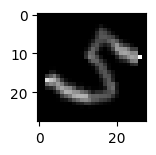

Corresponding label:5


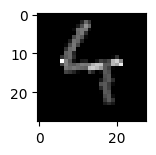

Corresponding label:4


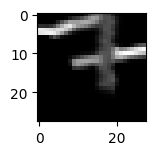

Corresponding label:7


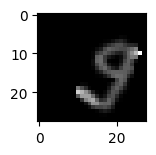

Corresponding label:9


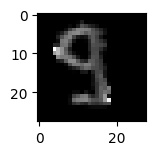

Corresponding label:9


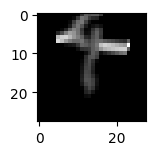

Corresponding label:4


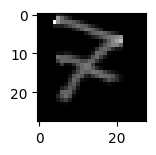

Corresponding label:7


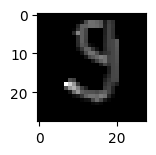

Corresponding label:9


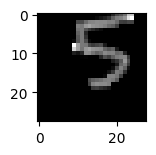

Corresponding label:5


In [10]:
for i in range(9):  
    plt.subplot(330 + 1 + i)
    plt.imshow(shuffled_x_train[i], cmap=plt.get_cmap('gray'))
    plt.show()
    print(f"Corresponding label:{shuffled_y_train[i]}")

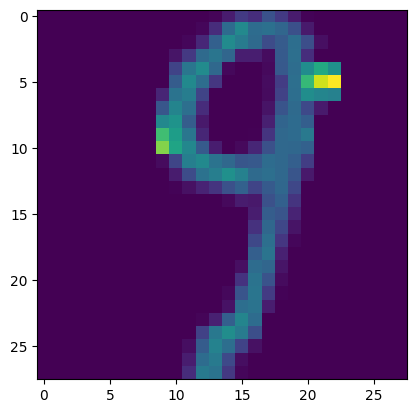

In [11]:
plt.imshow(shuffled_x_train[62])

In [12]:
print(shuffled_y_train.shape)

(3696,)


In [13]:
# for i in range(2073):  
# #     plt.subplot(330 + 1 + i)
#     plt.imshow(shuffled_x_train[i], cmap=plt.get_cmap('gray'))
#     plt.show()
#     print(f"Corresponding label:{shuffled_y_train[i]}")

## After analyzing the newly created examples and removing the deviant parts, 2073 samples remained. Now you can finetune the model on your dataset. As you could see in the test video, the model had problems predicting the number 9, mistaking it for 0. After fine tuining the model to our needs, it should no longer have a problem with this.


In [14]:
model_1_to_tune = keras.models.load_model("model_1.h5")

2024-04-29 20:16:43.749827: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2024-04-29 20:16:43.750806: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2024-04-29 20:16:43.762904: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-04-29 20:16:43.763063: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 960 computeCapability: 5.2
coreClock: 1.2785GHz coreCount: 8 deviceMemorySize: 3.94GiB deviceMemoryBandwidth: 104.46GiB/s
2024-04-29 20:16:43.763079: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2024-04-29 20:16:43.764909: I tensorflow/stream_executor/platform/def

In [15]:
for layer in model_1_to_tune.layers[:-3]:
    layer.trainable = False

In [16]:
class ADJUSTLR(keras.callbacks.Callback):
    def __init__ (self, model, freq, factor, verbose):
        self.model=model
        self.freq=freq
        self.factor =factor
        self.verbose=verbose
        self.adj_epoch=freq
    def on_epoch_end(self, epoch, logs=None):
        if epoch + 1 == self.adj_epoch: # adjust the learning rate
            lr=float(tf.keras.backend.get_value(self.model.optimizer.lr)) # get the current learning rate
            new_lr=lr * self.factor
            self.adj_epoch +=self.freq
            if self.verbose == 1:
                print('\non epoch ',epoch + 1, ' lr was adjusted from ', lr, ' to ', new_lr)
            tf.keras.backend.set_value(self.model.optimizer.lr, new_lr) # set the learning rate in the optimizer

In [17]:
freq=10
factor=.7
verbose=1
callbacks=[ADJUSTLR(model_1_to_tune, freq, factor, verbose)]

In [18]:
model_1_to_tune.compile(loss = "sparse_categorical_crossentropy", optimizer = keras.optimizers.Adam(learning_rate=0.1), metrics=['accuracy'])

In [19]:
model_1_to_tune.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        25632     
_________________________________________________________________
batch_normalization_2 (Batch (None, 12, 12, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0

In [20]:
print(shuffled_x_train.shape)

(3696, 28, 28, 1)


In [21]:
history = model_1_to_tune.fit(shuffled_x_train, shuffled_y_train, epochs = 100, validation_split = 0.3, batch_size=256, callbacks=[callbacks])

Epoch 1/100


2024-04-29 20:16:44.600452: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2024-04-29 20:16:44.600892: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3199980000 Hz
2024-04-29 20:16:45.215677: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2024-04-29 20:16:45.363114: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7


11/11 [==============================] - 2s 77ms/step - loss: 1.8174 - accuracy: 0.6802 - val_loss: 0.5443 - val_accuracy: 0.8350
Epoch 2/100
11/11 [==============================] - 0s 21ms/step - loss: 0.7598 - accuracy: 0.7863 - val_loss: 0.5164 - val_accuracy: 0.8287
Epoch 3/100
11/11 [==============================] - 0s 22ms/step - loss: 0.6937 - accuracy: 0.7898 - val_loss: 0.3935 - val_accuracy: 0.8683
Epoch 4/100
11/11 [==============================] - 0s 22ms/step - loss: 0.5986 - accuracy: 0.8250 - val_loss: 0.3452 - val_accuracy: 0.8963
Epoch 5/100
11/11 [==============================] - 0s 22ms/step - loss: 0.6427 - accuracy: 0.8136 - val_loss: 0.3509 - val_accuracy: 0.8918
Epoch 6/100
11/11 [==============================] - 0s 22ms/step - loss: 0.6307 - accuracy: 0.8004 - val_loss: 0.4374 - val_accuracy: 0.8557
Epoch 7/100
11/11 [==============================] - 0s 20ms/step - loss: 0.6519 - accuracy: 0.8088 - val_loss: 0.3816 - val_accuracy: 0.8792
Epoch 8/100
11/11 

11/11 [==============================] - 0s 19ms/step - loss: 0.4231 - accuracy: 0.8629 - val_loss: 0.2552 - val_accuracy: 0.9225
Epoch 56/100
11/11 [==============================] - 0s 22ms/step - loss: 0.4342 - accuracy: 0.8637 - val_loss: 0.2420 - val_accuracy: 0.9261
Epoch 57/100
11/11 [==============================] - 0s 22ms/step - loss: 0.4080 - accuracy: 0.8628 - val_loss: 0.2542 - val_accuracy: 0.9243
Epoch 58/100
11/11 [==============================] - 0s 20ms/step - loss: 0.4078 - accuracy: 0.8664 - val_loss: 0.2362 - val_accuracy: 0.9324
Epoch 59/100
11/11 [==============================] - 0s 22ms/step - loss: 0.3906 - accuracy: 0.8836 - val_loss: 0.2434 - val_accuracy: 0.9306
Epoch 60/100
11/11 [==============================] - 0s 21ms/step - loss: 0.3736 - accuracy: 0.8813 - val_loss: 0.2346 - val_accuracy: 0.9270

on epoch  60  lr was adjusted from  0.01680699922144413  to  0.01176489945501089
Epoch 61/100
11/11 [==============================] - 0s 22ms/step - loss

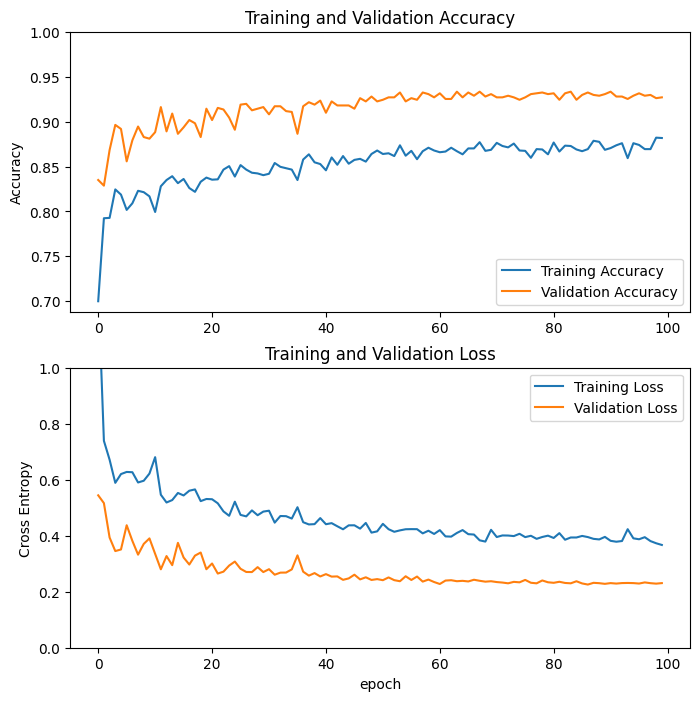

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [24]:
import numpy as np

font_scale = 1.0
font = cv2.FONT_HERSHEY_PLAIN

cap = cv2.VideoCapture("test3.webm")
# Check if video is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open video")

paused = False  # Flag to track video pause state
frame_number = 0  # Store the frame number when pausing

while True:
    if not paused:
        ret, frame = cap.read()
        if not ret:
            break
        frame_number += 1

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        resized = cv2.resize(gray, (28, 28), interpolation=cv2.INTER_AREA)
        newimg = tf.keras.utils.normalize(resized, axis=1)
        newimg = np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
        predictions = model_1_to_tune.predict(newimg)
        status = np.argmax(predictions)
        probabilities = predictions[0]

        x1, y1, w1, h1 = 0, 0, 175, 75
        # Draw black background rectangle
#         cv2.rectangle(frame, (x1, x1), (x1 + w1 + 80, y1 + h1), (0, 255, 0), -1)
        # Add text for predicted value
        text = "Predicted value: " + str(status)
        text_width, text_height = cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)[0]
        x_text = x1 + int(w1 / 5)
        y_text = y1 + int(h1 / 2) + int(text_height / 2)
        cv2.putText(frame, text, (x_text, y_text), font, font_scale, (0, 0, 255), 1)
        # Add text for probabilities
        for i, prob in enumerate(probabilities):
            text_prob = f"Prob {i}: {prob*100:.2f}%"
            y_text_prob = y_text + (i + 1) * 20  # Adjust spacing between probabilities
            cv2.putText(frame, text_prob, (x_text, y_text_prob), font, font_scale, (0, 0, 255), 1)

        cv2.imshow("MNIST data CNN model result video", frame)

    key = cv2.waitKey(1)
    if key == ord(' '):  # Pause/unpause video on spacebar press
        paused = not paused
        if paused:
            frame_number -= 1  # Adjust frame number to resume from the current frame
    elif key == ord('q'):
        break

    # Seek to the stored frame number if unpausing
    if not paused:
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)

cap.release()
cv2.destroyAllWindows()


## 